# Correct way of downsampling an audio signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy import signal

In [2]:
def add_tone(signal, fs, tune_freq, tune_amp):
    tau = 1 / fs
    time_signal = np.arange(signal.shape[0]) * tau
    tone_signal = np.sin(time_signal * 2 * np.pi * tune_freq) * tune_amp
    return signal + tone_signal

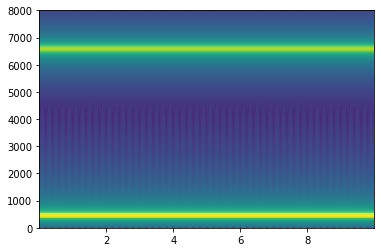

In [3]:
fs = 16000
amp = .2

x = np.zeros(fs * 10)
sf.write('zero.wav', x, fs)

x = add_tone(x, fs, 440, amp)
x = add_tone(x, fs, 6600, amp / 7)
sf.write('tone.wav', x, fs)

_ = plt.specgram(x, Fs=fs)

# Downsample with eliminating samples

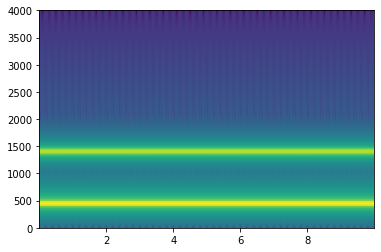

In [4]:
sf.write('downsample1.wav', x[::2], fs // 2)
_ = plt.specgram(x[::2], Fs=fs // 2)

Where is 1.4KHz comes from?

The answer is: 8 - 6.6 = 1.4

Respect the nyquest frequence and aliasing :)

# Downsample with LPF

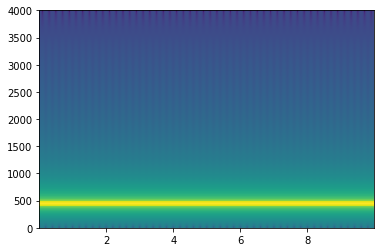

In [5]:
cutoff = 4000
order = 10
b, a = signal.butter(order, cutoff, btype='lowpass', output='ba', fs=fs)
y = signal.filtfilt(b, a, x)

sf.write('downsample2.wav', y[::2], fs // 2)
_ = plt.specgram(y[::2], Fs=fs // 2)